# Heat equation
### Kirill Zakharov

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
plt.style.use("ggplot")

In [12]:
#triangle distribution
def f_t(x, a, b):
    c = (a+b)/2
    if a <= x <= c:
        return 2*(x-a)/((b-a)*(c-a))
    elif c < x <= b:
        return 2*(b-x)/((b-a)*(b-c))
    else:
        return 0

#parabolic distribution
def f_p(x, a, b):
    return (6*(x-a)*(b-x))/(b-a)**3
    
N = 100
L = 1
dx=1
dt = 0.001
x = np.linspace(0, 1, N)
t=20
l=0.5
c=1
p=0.8
a=np.sqrt(l/(c*p))
initial_temp = [f_p(i, 0, L) for i in x]

In [13]:
#generate the grid
matrix = [initial_temp]

for j in range(t):
        matrix.append([0]*N)   

In [14]:
#main loop
for j in range(t):
    for i in range(1, N-1):
        matrix[j+1][i] = (matrix[j][i-1] + matrix[j][i+1])/2

In [15]:
def solution(f, N=20, L=1, dt=0.5):
    x = np.linspace(0, 1, N)
    initial_temp = [f(i, 0, L) for i in x]
    matrix = [initial_temp]

    for j in range(t):
        matrix.append([0]*N)
        
    for j in range(t):
        for i in range(1, N-1):
#             matrix[j+1][i] = (matrix[j][i-1] + matrix[j][i+1])/2
            matrix[j+1][i] = matrix[j][i]*(1-2*a**2*dt/dx**2)+a**2*dt/dx**2*(matrix[t][i+1]+matrix[t][i-1])
    return matrix        

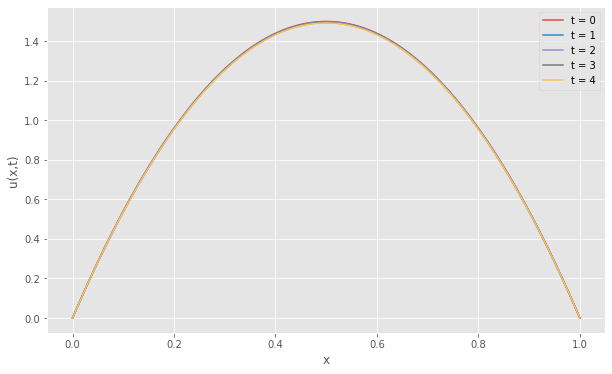

In [16]:
plt.subplots(figsize=(10,6))
s = solution(f_p,N, L, dt)

for i in range(5):
    plt.plot(x, s[i], label = f't = {i}')
    

plt.legend()
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.show()

In [18]:
import plotly.graph_objects as go
t1 = np.arange(0, 1, 0.01)
fig = go.Figure(go.Surface(
#     contours = {
#         "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
#         "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
#     },
    x = x,
    y = t1,
    z = s))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()